In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

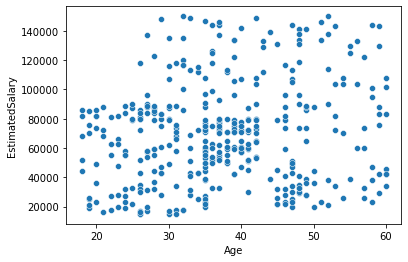

In [4]:
sns.scatterplot(x=df["Age"],y=df["EstimatedSalary"],cmap="rainbow")

In [5]:
x=df[["Age","EstimatedSalary"]]

# Model Training

In [20]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [21]:
y_var=kmeans.fit_predict(x)
y_var

array([0, 0, 3, 3, 1, 3, 1, 2, 0, 3, 1, 3, 1, 0, 1, 1, 0, 0, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 0, 3, 0, 1, 2, 0, 3, 1, 0, 0, 3, 1, 0, 0, 3, 2, 0,
       1, 0, 1, 3, 2, 1, 0, 3, 1, 0, 3, 3, 3, 1, 0, 2, 0, 1, 3, 2, 1, 3,
       0, 1, 3, 1, 1, 0, 0, 2, 0, 2, 3, 0, 1, 0, 1, 3, 3, 1, 3, 2, 3, 1,
       1, 3, 1, 2, 0, 0, 1, 3, 0, 2, 1, 0, 1, 3, 1, 2, 0, 1, 0, 1, 1, 1,
       1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 0, 0, 1, 3, 0,
       1, 1, 3, 3, 1, 2, 3, 0, 1, 1, 3, 1, 0, 1, 1, 0, 3, 1, 0, 3, 1, 3,
       3, 0, 3, 1, 0, 2, 1, 1, 0, 0, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 1, 0,
       3, 0, 0, 0, 0, 1, 2, 3, 3, 3, 1, 3, 1, 0, 1, 0, 3, 1, 1, 3, 1, 0,
       1, 0, 0, 1, 2, 1, 1, 3, 2, 2, 2, 0, 1, 2, 3, 3, 3, 2, 3, 1, 1, 2,
       1, 1, 2, 1, 3, 3, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 2, 2, 3,
       1, 2, 1, 2, 3, 2, 3, 1, 0, 3, 2, 2, 3, 1, 1, 3, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 1, 2, 3, 2, 1, 3, 2, 0, 1, 1, 1, 0, 0, 1, 3, 1, 0, 2, 1,
       3, 2, 1, 1, 2, 1, 0, 1, 3, 3, 1, 2, 1, 2, 0,

# WCSS

In [19]:
kmeans.inertia_  # k=2

165197378568.7129

In [13]:
kmeans.inertia_  # k=3

59489963536.99384

In [16]:
kmeans.inertia_  # k=3

463878521346.39

In [22]:
kmeans.inertia_  # k=4

33459749146.525547

In [23]:
kmeans.cluster_centers_

array([[3.72643678e+01, 2.68735632e+04],
       [3.59701493e+01, 8.04850746e+04],
       [4.24788732e+01, 1.26338028e+05],
       [3.68888889e+01, 5.37407407e+04]])

In [24]:
wcss_list=[]
for i in range(1,7):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss=kmeans.inertia_
    print(f"k=={i} and wcss=={wcss}")
    wcss_list.append(wcss)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k==1 and wcss==463878521346.39
k==2 and wcss==165263007019.02872
k==3 and wcss==59489963536.99384
k==4 and wcss==33459749146.525547
k==5 and wcss==19983401049.300743
k==6 and wcss==14690913271.804781


# Plotting Graph

Text(0, 0.5, 'The value of wcss')

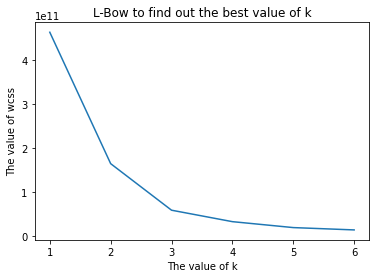

In [25]:
k=range(1,7)

plt.plot(k,wcss_list)
plt.title("L-Bow to find out the best value of k")
plt.xlabel("The value of k")
plt.ylabel("The value of wcss")

In [27]:
k_means=KMeans(n_clusters=3)
k_means.fit(x)

KMeans(n_clusters=3)

In [28]:
k_means.inertia_

59489963536.99384

In [29]:
k_means.cluster_centers_

array([[3.76737589e+01, 3.47872340e+04],
       [3.55891892e+01, 7.41567568e+04],
       [4.27837838e+01, 1.25310811e+05]])

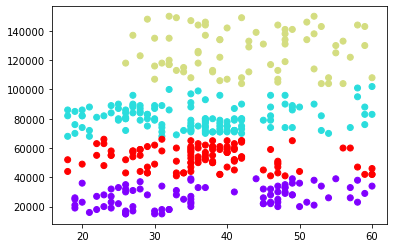

In [38]:
plt.scatter(df["Age"],df["EstimatedSalary"],c=y_var,cmap='rainbow')

In [40]:
df1=pd.read_csv("cust_segmentation_Data.csv")
df1

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [33]:
df1.isna().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

<AxesSubplot:xlabel='Income', ylabel='DebtIncomeRatio'>

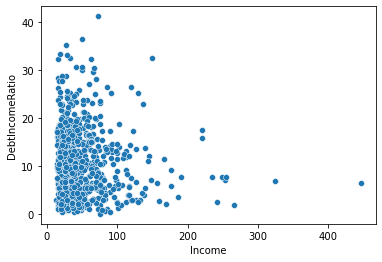

In [41]:
sns.scatterplot(x=df1["Income"],y=df1["DebtIncomeRatio"])

In [43]:
x=df1[["Income","DebtIncomeRatio"]]

# Model Training

In [44]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [45]:
y_var=kmeans.fit_predict(x)
y_var

array([0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [46]:
kmeans.inertia_

302733.4723883792

In [47]:
kmeans.cluster_centers_

array([[ 31.36697248,  10.1324159 ],
       [ 85.48333333,  10.53833333],
       [235.8125    ,   7.65      ]])

# WCSS

In [49]:
wcss_list=[]
for i in range(1,7):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss=kmeans.inertia_
    print(f"K = {i} and wcss = {wcss}")
    wcss_list.append(wcss)

K = 1 and wcss = 1299579.4878705882
K = 2 and wcss = 566668.0965265137
K = 3 and wcss = 302733.4723883792
K = 4 and wcss = 189981.213929947
K = 5 and wcss = 145366.16989820724
K = 6 and wcss = 111467.0292257732


# Ploting Graph

Text(0, 0.5, 'The value of wcss')

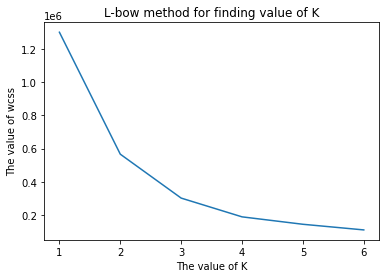

In [52]:
k=range(1,7)

plt.title("L-bow method for finding value of K")
plt.plot(k,wcss_list)
plt.xlabel("The value of K")
plt.ylabel("The value of wcss")

In [53]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [55]:
y_var=kmeans.fit_predict(x)
y_var

array([0, 1, 3, 0, 2, 3, 3, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 3, 1, 3, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0,
       3, 0, 0, 0, 3, 3, 1, 0, 0, 0, 0, 0, 1, 3, 3, 3, 1, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 3, 3, 0, 3, 0, 0, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 1, 1, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       3, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 1, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 0,
       3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,

In [56]:
kmeans.cluster_centers_

array([[ 28.50086957,  10.01391304],
       [123.89830508,   9.1       ],
       [270.9       ,   8.21      ],
       [ 64.40291262,  11.01407767]])

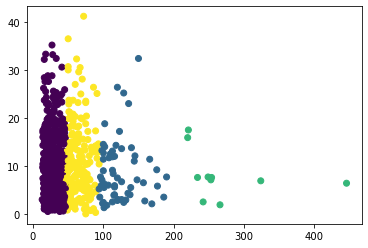

In [58]:
plt.scatter(df1["Income"],df1["DebtIncomeRatio"],c=y_var)